In [1]:
import pandas as pd

df = pd.read_csv('data/all.csv', encoding='utf-8-sig')

In [7]:


import rhinoMorph
rn = rhinoMorph.startRhino()

#stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임"
stop_words= "지하조직 프리랜서 대한민국  조직 이재명 기상천 자원관리도우미 레고 피보 프리랜서분 정답 은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임 하 있 되 않 었 사람 지 보 때 같 년 대하 주 말 일 위하 때문 말하 가 받 그렇 알 하 경우 가요"
stop_words = stop_words.split(' ')
stop_words[0:10]

filepath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages
classpath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


['지하조직', '프리랜서', '대한민국', '', '조직', '이재명', '기상천', '자원관리도우미', '레고', '피보']

In [8]:
df

,URL 주소,댓글작성자명,댓글작성일자,댓글 내용
0,https://www.youtube.com//watch?v=3tgTPGOlcr4,lazy man,1개월 전,1분으로 간결하게 정리되어 있는 컨텐츠 좋네요~
1,https://www.youtube.com//watch?v=3tgTPGOlcr4,이성윤의 중소기업컨설팅,1개월 전,짧지만 알찬 설명 감사드립니다~
2,https://www.youtube.com//watch?v=QRycZR13GKE,윤이,1주 전,안녕하세요 요즘 알아보다가 우연히 영상을 접하게 되었습니다 헬스트레이너로 일하고있습...
3,https://www.youtube.com//watch?v=9DZS3QuZCgo,렛잇꼬 TV,5개월 전,안전 제일!!
4,https://www.youtube.com//watch?v=cWkDY86gV2w,longing,5개월 전,"해당요건이 되는지 잘 알아 봐야겠네요.귀중한 정보, 상세한 설명, 정말 감사합니다."
...,...,...,...,...
7437,https://www.youtube.com//watch?v=E1LPrpc3RFI,데헷,4개월 전,많은 도움 되었습니다~ 감사합니다.
7438,https://www.youtube.com//watch?v=E1LPrpc3RFI,내일은벼락부자,9개월 전,유익한 영상 감사합니다.
7439,https://www.youtube.com//watch?v=gm2GlU6uCq0,momom mm,1년 전,혹시 모르니 조모씨 한번 털어 보면 어떨까요?지금 분위기 봐서는 뭔가 나올거같아
7440,https://www.youtube.com//watch?v=-Z_phlCGA74,김옥이,3년 전,산재를합이를해는데연금으로받기로해는데


In [9]:
import re
answer_sentences = []
for post in df['댓글 내용']:
    answer_sentences.extend(re.split('; |\.|\?|\!', post))
#title_sentences[0:100]


answer_sentences_nouns = []

for senten in answer_sentences:
    morphed_data_sentences = [noun_answer for noun_answer in rhinoMorph.onlyMorph_list(rn, senten, pos=['NNG', 'NNP'],combineN=True) if noun_answer not in stop_words]
    answer_sentences_nouns.append(morphed_data_sentences)
#sentences_nouns


answer_sentences_nouns_result = []

for i in answer_sentences_nouns:
    senten_list=[]
    for j in i:
        if len(j)== 1:
            continue
        senten_list.append(j)
    answer_sentences_nouns_result.append(senten_list)
#sentences_nouns_result

answer_result = []

for i in answer_sentences_nouns_result:
    if len(i) ==0:
        continue
    i = " ".join(i)
    answer_result.append(i)

#title_result

answer_result= ",".join(answer_result)
answer_result = answer_result.replace(","," ")
#title_result

final_answer = answer_result.split(" ")
#final_title

from collections import Counter

wordInfo_answer = Counter(final_answer)
#wordInfo_title

answer_top50 = dict(wordInfo_answer.most_common(50))
answer_top50



{'회사': 939,
 '산재': 834,
 '신청': 403,
 '영상': 394,
 '정보': 366,
 '병원': 359,
 '안녕': 328,
 '산재처리': 314,
 '산재보험': 252,
 '정도': 251,
 '보상': 250,
 '국민': 232,
 '사고': 223,
 '시간': 204,
 '현장': 203,
 '지금': 198,
 '비밀': 196,
 '감사': 186,
 '문제': 184,
 '치료': 183,
 '이상': 179,
 '상태': 175,
 '나라': 174,
 '도움': 173,
 '노무사': 171,
 '코로나': 167,
 '근로자': 164,
 '본인': 163,
 '생각': 162,
 '산재신청': 158,
 '상황': 156,
 '수술': 155,
 '직장': 149,
 '업무': 149,
 '정부': 148,
 '부분': 147,
 '가능': 143,
 '질문': 143,
 '서류': 135,
 '아버지': 134,
 '월급': 133,
 '내용': 133,
 '승인': 132,
 '비밀조직': 129,
 '부탁': 126,
 '처리': 126,
 '선생': 125,
 '근무': 123,
 '방법': 122,
 '급여': 122}

In [10]:
answer_top30 = dict(wordInfo_answer.most_common(30))
answer_top30

{'회사': 939,
 '산재': 834,
 '신청': 403,
 '영상': 394,
 '정보': 366,
 '병원': 359,
 '안녕': 328,
 '산재처리': 314,
 '산재보험': 252,
 '정도': 251,
 '보상': 250,
 '국민': 232,
 '사고': 223,
 '시간': 204,
 '현장': 203,
 '지금': 198,
 '비밀': 196,
 '감사': 186,
 '문제': 184,
 '치료': 183,
 '이상': 179,
 '상태': 175,
 '나라': 174,
 '도움': 173,
 '노무사': 171,
 '코로나': 167,
 '근로자': 164,
 '본인': 163,
 '생각': 162,
 '산재신청': 158}

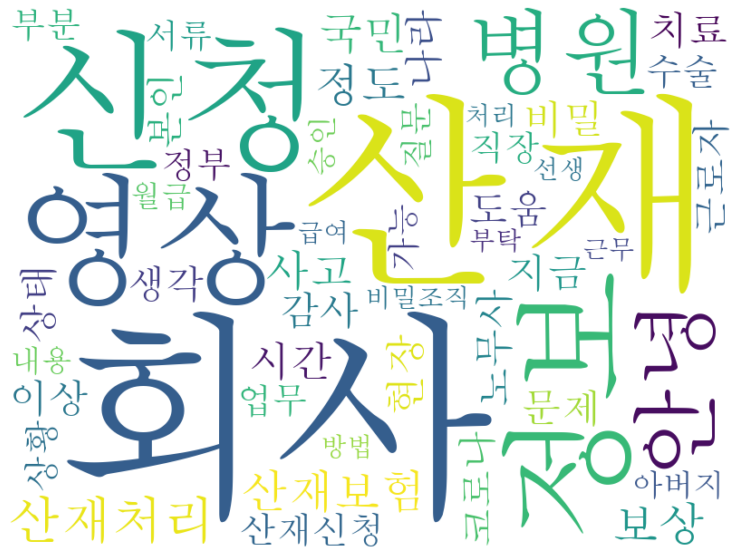

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(font_path='C:/windows/fonts/batang.ttc', width=800, height=600,background_color='white').generate_from_frequencies(answer_top50)
plt.figure(figsize=(30,10))
plt.imshow(cloud, interpolation='bilinear')  # 글자를 더 부드럽게 나오게 한다
plt.axis('off')                              # X축과 Y축의 위치 정보 off
plt.show()

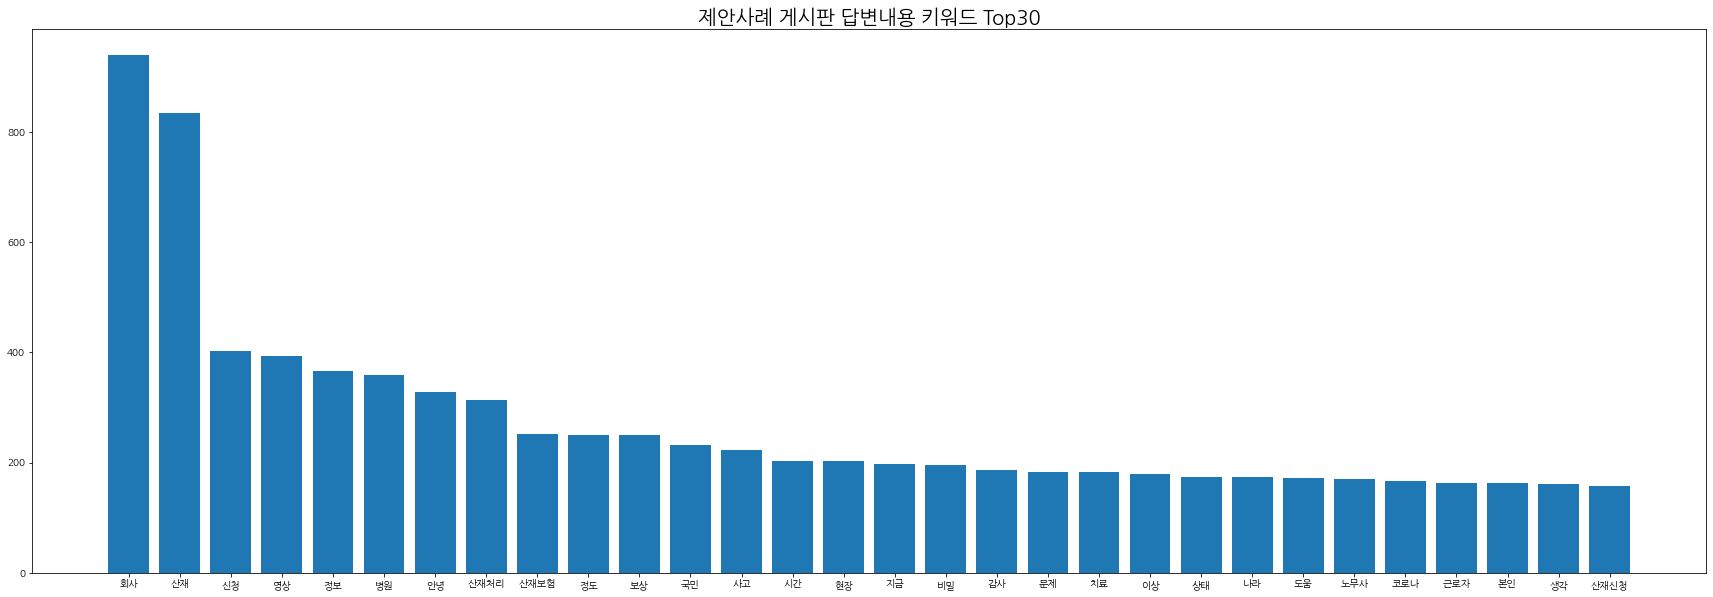

In [15]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

top_title_keys=[i for i in answer_top50.keys()]
top_title_values=[i for i in answer_top50.values()]

plt.figure(figsize= (30,10))
plt.title("제안사례 게시판 답변내용 키워드 Top30", fontsize=20)
plt.bar(list(top_title_keys[:30]), list(top_title_values[:30]))
plt.show()

In [16]:
#content_top_100 

answer_top50_word2id = {w: i for i, w in enumerate(answer_top50.keys())}
answer_top50_word2id

{'회사': 0,
 '산재': 1,
 '신청': 2,
 '영상': 3,
 '정보': 4,
 '병원': 5,
 '안녕': 6,
 '산재처리': 7,
 '산재보험': 8,
 '정도': 9,
 '보상': 10,
 '국민': 11,
 '사고': 12,
 '시간': 13,
 '현장': 14,
 '지금': 15,
 '비밀': 16,
 '감사': 17,
 '문제': 18,
 '치료': 19,
 '이상': 20,
 '상태': 21,
 '나라': 22,
 '도움': 23,
 '노무사': 24,
 '코로나': 25,
 '근로자': 26,
 '본인': 27,
 '생각': 28,
 '산재신청': 29,
 '상황': 30,
 '수술': 31,
 '직장': 32,
 '업무': 33,
 '정부': 34,
 '부분': 35,
 '가능': 36,
 '질문': 37,
 '서류': 38,
 '아버지': 39,
 '월급': 40,
 '내용': 41,
 '승인': 42,
 '비밀조직': 43,
 '부탁': 44,
 '처리': 45,
 '선생': 46,
 '근무': 47,
 '방법': 48,
 '급여': 49}

In [17]:
#content_top_100 

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'회사': 0,
 '산재': 1,
 '신청': 2,
 '영상': 3,
 '정보': 4,
 '병원': 5,
 '안녕': 6,
 '산재처리': 7,
 '산재보험': 8,
 '정도': 9,
 '보상': 10,
 '국민': 11,
 '사고': 12,
 '시간': 13,
 '현장': 14,
 '지금': 15,
 '비밀': 16,
 '감사': 17,
 '문제': 18,
 '치료': 19,
 '이상': 20,
 '상태': 21,
 '나라': 22,
 '도움': 23,
 '노무사': 24,
 '코로나': 25,
 '근로자': 26,
 '본인': 27,
 '생각': 28,
 '산재신청': 29}

In [18]:

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'회사': 0,
 '산재': 1,
 '신청': 2,
 '영상': 3,
 '정보': 4,
 '병원': 5,
 '안녕': 6,
 '산재처리': 7,
 '산재보험': 8,
 '정도': 9,
 '보상': 10,
 '국민': 11,
 '사고': 12,
 '시간': 13,
 '현장': 14,
 '지금': 15,
 '비밀': 16,
 '감사': 17,
 '문제': 18,
 '치료': 19,
 '이상': 20,
 '상태': 21,
 '나라': 22,
 '도움': 23,
 '노무사': 24,
 '코로나': 25,
 '근로자': 26,
 '본인': 27,
 '생각': 28,
 '산재신청': 29}

In [19]:
answer_top50_id2word = {i: w for i, w in enumerate(answer_top50.keys())}
answer_top50_id2word

{0: '회사',
 1: '산재',
 2: '신청',
 3: '영상',
 4: '정보',
 5: '병원',
 6: '안녕',
 7: '산재처리',
 8: '산재보험',
 9: '정도',
 10: '보상',
 11: '국민',
 12: '사고',
 13: '시간',
 14: '현장',
 15: '지금',
 16: '비밀',
 17: '감사',
 18: '문제',
 19: '치료',
 20: '이상',
 21: '상태',
 22: '나라',
 23: '도움',
 24: '노무사',
 25: '코로나',
 26: '근로자',
 27: '본인',
 28: '생각',
 29: '산재신청',
 30: '상황',
 31: '수술',
 32: '직장',
 33: '업무',
 34: '정부',
 35: '부분',
 36: '가능',
 37: '질문',
 38: '서류',
 39: '아버지',
 40: '월급',
 41: '내용',
 42: '승인',
 43: '비밀조직',
 44: '부탁',
 45: '처리',
 46: '선생',
 47: '근무',
 48: '방법',
 49: '급여'}

In [20]:
answer_top30_id2word = {i: w for i, w in enumerate(answer_top30.keys())}
answer_top30_id2word

{0: '회사',
 1: '산재',
 2: '신청',
 3: '영상',
 4: '정보',
 5: '병원',
 6: '안녕',
 7: '산재처리',
 8: '산재보험',
 9: '정도',
 10: '보상',
 11: '국민',
 12: '사고',
 13: '시간',
 14: '현장',
 15: '지금',
 16: '비밀',
 17: '감사',
 18: '문제',
 19: '치료',
 20: '이상',
 21: '상태',
 22: '나라',
 23: '도움',
 24: '노무사',
 25: '코로나',
 26: '근로자',
 27: '본인',
 28: '생각',
 29: '산재신청'}

In [21]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_50 = np.zeros((50, 50), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top50_word2id.items():
        if wi in sentence:
            for wj, j in answer_top50_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_50[i][j] += 1
answer_adjacent_matrix_50

array([[  0, 142,  41, ...,  16,  12,  13],
       [142,   0,  93, ...,   7,   6,  16],
       [ 41,  93,   0, ...,   8,   6,  17],
       ...,
       [ 16,   7,   8, ...,   0,   0,   1],
       [ 12,   6,   6, ...,   0,   0,   0],
       [ 13,  16,  17, ...,   1,   0,   0]])

In [22]:
answer_sentences_nouns_result

[['컨텐츠'],
 ['설명', '감사'],
 ['안녕', '요즘', '영상', '헬스트레이너', '시간정도', '기본급', '수업', '진행', '인센티브', '구조', '절차'],
 ['특수근로자', '해당'],
 ['영상'],
 [],
 ['안전'],
 [],
 [],
 ['해당요건'],
 ['정보', '상세', '설명'],
 [],
 ['소득', '인터넷', '건강보험료', '건강보', '사이트', '세대원', '강보'],
 ['은정', '통화', '폭주상태'],
 [],
 [],
 [],
 ['정보'],
 ['지인', '기초생활수급자'],
 ['아빠', '엄마', '뇌수술', '중환자실'],
 [],
 ['할머니', '누나', '성인'],
 ['학생', '직장', '한명인', '혜택'],
 ['은정'],
 ['소득', '이하', '소득감소', '올해'],
 ['작년', '증감', '변화', '신청자', '해당'],
 [],
 ['양질', '일자리', '창출', '부탁'],
 ['평생교육', '강사', '작년', '코로나', '수입', '의료보험', '작년', '내기', '시작', '이유', '지원'],
 ['무급', '직업', '청춘', '지급'],
 ['친절', '설명', '가구원', '지원금', '해당사항', '지원금'],
 ['가구'],
 [],
 ['개인사업자', '연매출', '이상', '소득증명', '신청'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['소득문제', '인터넷관련', '사업자', '현실적', '매출'],
 [],
 ['긴급고용안정지원금'],
 [],
 ['지원대상', '요건'],
 ['지원대상', '세부', '설명'],
 ['지원', '세부', '설명'],
 ['신천기', '방법'],
 [],
 ['기존', '지원금', '중복', '가능', '여부'],
 ['외국인', '가능'],
 [],
 ['모의확인', '문의저', '올해', '경력증명', '지원금'],
 ['보건복지', '영상', '동료'],
 [

In [23]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_30 = np.zeros((30, 30), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top30_word2id.items():
        if wi in sentence:
            for wj, j in answer_top30_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_30[i][j] += 1
answer_adjacent_matrix_30

array([[  0, 142,  41,  17,   2,  54,  31,  57,  12,  22,  24,   4,  36,
         15,   9,  41,   0,   4,  20,  36,  27,  14,   5,  12,  20,   0,
         28,  13,  13,  50],
       [142,   0,  93,  20,   9,  40,  24,  16,  26,  27,  57,   0,  28,
         10,  31,  36,   0,  14,  10,  48,   5,  17,   5,  21,  30,   0,
         18,  12,  24,  13],
       [ 41,  93,   0,   6,   2,   4,  13,   7,   5,  19,   2,   0,   3,
         16,   1,   3,   0,   3,   4,   6,   6,   8,   1,  11,  21,   3,
          8,  14,   3,   1],
       [ 17,  20,   6,   0,  16,   5,  18,   6,  14,   2,   1,   3,   9,
          3,   0,   3,   0,  19,   6,   0,   1,   6,   0,  26,   9,   8,
          1,   2,   8,   5],
       [  2,   9,   2,  16,   0,   0,  13,   0,  14,   1,   1,   8,   9,
          0,   0,   0,  18,  38,   2,   0,   3,   0,   6,   8,   2,   5,
          6,   0,   0,   0],
       [ 54,  40,   4,   5,   0,   0,   2,  53,   6,  10,   3,   0,   5,
         10,  14,  20,   0,   0,   4,  25,  19,   3,

In [24]:
answer_adjacent_matrix_50.shape, answer_adjacent_matrix_30.shape

((50, 50), (30, 30))

In [25]:
import networkx as nx
answer_network_30 = nx.from_numpy_matrix(answer_adjacent_matrix_30)
list(answer_network_30.adjacency())

[(0,
  {1: {'weight': 142},
   2: {'weight': 41},
   3: {'weight': 17},
   4: {'weight': 2},
   5: {'weight': 54},
   6: {'weight': 31},
   7: {'weight': 57},
   8: {'weight': 12},
   9: {'weight': 22},
   10: {'weight': 24},
   11: {'weight': 4},
   12: {'weight': 36},
   13: {'weight': 15},
   14: {'weight': 9},
   15: {'weight': 41},
   17: {'weight': 4},
   18: {'weight': 20},
   19: {'weight': 36},
   20: {'weight': 27},
   21: {'weight': 14},
   22: {'weight': 5},
   23: {'weight': 12},
   24: {'weight': 20},
   26: {'weight': 28},
   27: {'weight': 13},
   28: {'weight': 13},
   29: {'weight': 50}}),
 (1,
  {0: {'weight': 142},
   2: {'weight': 93},
   3: {'weight': 20},
   4: {'weight': 9},
   5: {'weight': 40},
   6: {'weight': 24},
   7: {'weight': 16},
   8: {'weight': 26},
   9: {'weight': 27},
   10: {'weight': 57},
   12: {'weight': 28},
   13: {'weight': 10},
   14: {'weight': 31},
   15: {'weight': 36},
   17: {'weight': 14},
   18: {'weight': 10},
   19: {'weight': 48}

In [26]:
answer_network_50 = nx.from_numpy_matrix(answer_adjacent_matrix_50)
list(answer_network_50.adjacency())

[(0,
  {1: {'weight': 142},
   2: {'weight': 41},
   3: {'weight': 17},
   4: {'weight': 2},
   5: {'weight': 54},
   6: {'weight': 31},
   7: {'weight': 57},
   8: {'weight': 12},
   9: {'weight': 22},
   10: {'weight': 24},
   11: {'weight': 4},
   12: {'weight': 36},
   13: {'weight': 15},
   14: {'weight': 9},
   15: {'weight': 41},
   17: {'weight': 4},
   18: {'weight': 20},
   19: {'weight': 36},
   20: {'weight': 27},
   21: {'weight': 14},
   22: {'weight': 5},
   23: {'weight': 12},
   24: {'weight': 20},
   26: {'weight': 28},
   27: {'weight': 13},
   28: {'weight': 13},
   29: {'weight': 50},
   30: {'weight': 21},
   31: {'weight': 22},
   32: {'weight': 13},
   33: {'weight': 21},
   34: {'weight': 2},
   35: {'weight': 26},
   36: {'weight': 10},
   37: {'weight': 20},
   38: {'weight': 10},
   39: {'weight': 19},
   40: {'weight': 21},
   41: {'weight': 1},
   42: {'weight': 37},
   44: {'weight': 7},
   45: {'weight': 42},
   46: {'weight': 4},
   47: {'weight': 16},


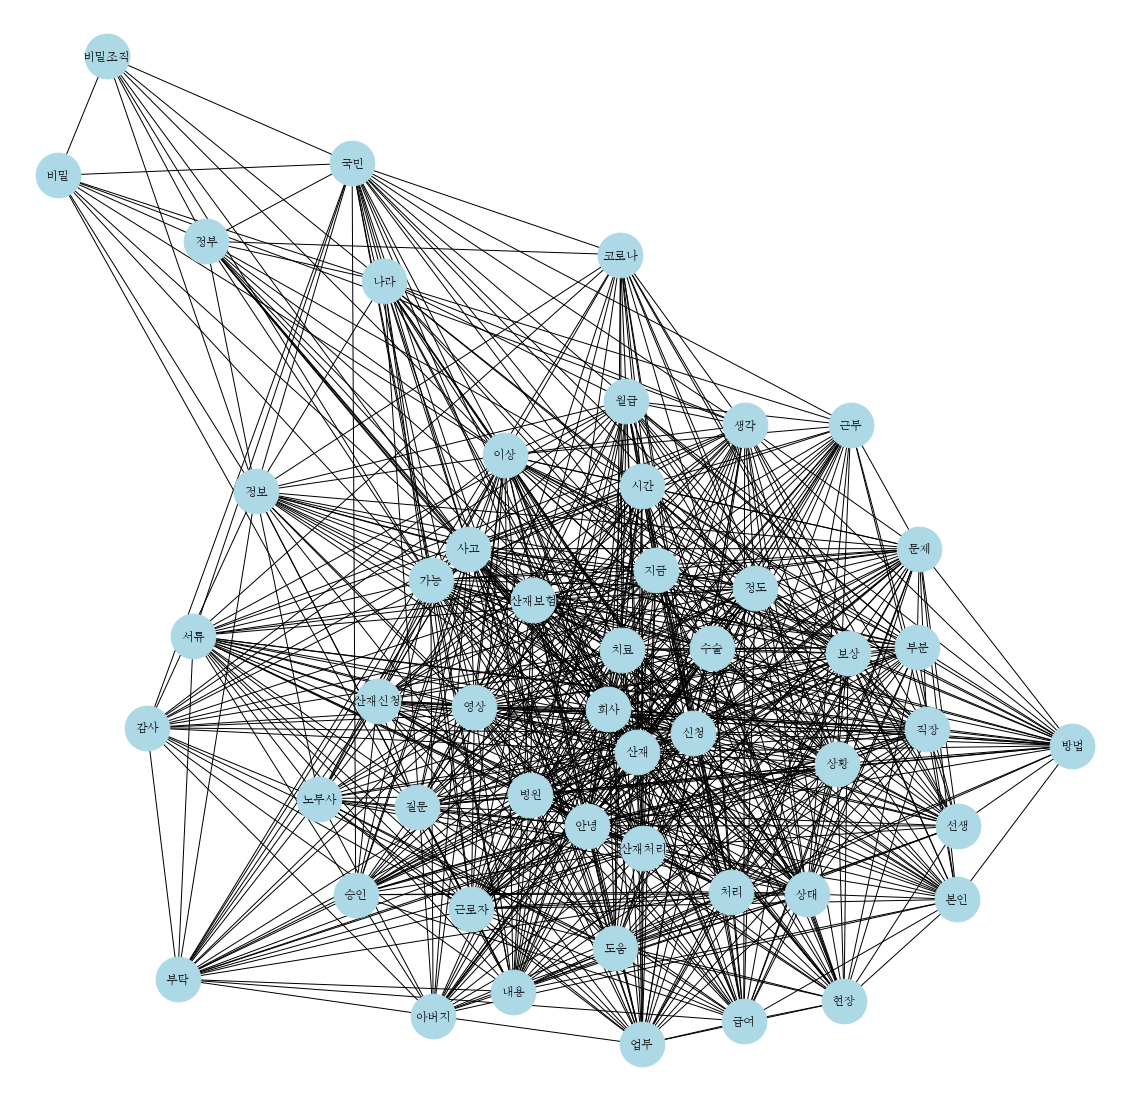

In [27]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_50, labels=answer_top50_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

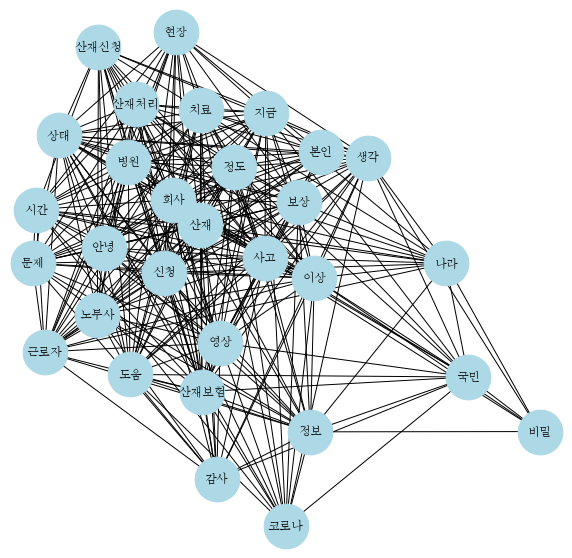

In [28]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_30, labels=answer_top30_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

# 근접중심성

In [29]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.33793103448275863,
 1: 0.28,
 2: 0.4298245614035088,
 3: 0.4336283185840708,
 4: 0.4260869565217391,
 5: 0.3288590604026846,
 6: 0.3712121212121212,
 7: 0.3888888888888889,
 8: 0.4188034188034188,
 9: 0.4298245614035088,
 10: 0.3983739837398374,
 11: 0.46226415094339623,
 12: 0.3402777777777778,
 13: 0.4537037037037037,
 14: 0.4666666666666667,
 15: 0.4152542372881356,
 16: 0.37404580152671757,
 17: 0.3858267716535433,
 18: 0.5,
 19: 0.46226415094339623,
 20: 0.5051546391752577,
 21: 0.49,
 22: 0.4117647058823529,
 23: 0.37404580152671757,
 24: 0.392,
 25: 0.44545454545454544,
 26: 0.49,
 27: 0.44545454545454544,
 28: 0.4803921568627451,
 29: 0.3828125,
 30: 0.4260869565217391,
 31: 0.3684210526315789,
 32: 0.47115384615384615,
 33: 0.46226415094339623,
 34: 0.3288590604026846,
 35: 0.494949494949495,
 36: 0.48514851485148514,
 37: 0.4260869565217391,
 38: 0.550561797752809,
 39: 0.3858267716535433,
 40: 0.44545454545454544,
 41: 0.49,
 42: 0.47115384615384615,
 43: 0.20331950207

In [30]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.20422535211267606,
 1: 0.14146341463414633,
 2: 0.3670886075949367,
 3: 0.3625,
 4: 0.3333333333333333,
 5: 0.26605504587155965,
 6: 0.2396694214876033,
 7: 0.35802469135802467,
 8: 0.3670886075949367,
 9: 0.3815789473684211,
 10: 0.3815789473684211,
 11: 0.3372093023255814,
 12: 0.25663716814159293,
 13: 0.32222222222222224,
 14: 0.34523809523809523,
 15: 0.30526315789473685,
 16: 0.27102803738317754,
 17: 0.32222222222222224,
 18: 0.3717948717948718,
 19: 0.3717948717948718,
 20: 0.3918918918918919,
 21: 0.3972602739726027,
 22: 0.3717948717948718,
 23: 0.3493975903614458,
 24: 0.2248062015503876,
 25: 0.3918918918918919,
 26: 0.4142857142857143,
 27: 0.29,
 28: 0.3670886075949367,
 29: 0.35365853658536583}

# 연결중심성

In [31]:
#Degree
nx.degree_centrality(answer_network_50)

{0: 0.9387755102040816,
 1: 0.9183673469387754,
 2: 0.9183673469387754,
 3: 0.7755102040816326,
 4: 0.5714285714285714,
 5: 0.7346938775510203,
 6: 0.7959183673469387,
 7: 0.6938775510204082,
 8: 0.6530612244897959,
 9: 0.7142857142857142,
 10: 0.6530612244897959,
 11: 0.4897959183673469,
 12: 0.8571428571428571,
 13: 0.6938775510204082,
 14: 0.5510204081632653,
 15: 0.7755102040816326,
 16: 0.2040816326530612,
 17: 0.3877551020408163,
 18: 0.673469387755102,
 19: 0.7551020408163265,
 20: 0.8571428571428571,
 21: 0.7755102040816326,
 22: 0.4693877551020408,
 23: 0.5510204081632653,
 24: 0.5102040816326531,
 25: 0.44897959183673464,
 26: 0.673469387755102,
 27: 0.5306122448979591,
 28: 0.673469387755102,
 29: 0.5918367346938775,
 30: 0.6938775510204082,
 31: 0.673469387755102,
 32: 0.6530612244897959,
 33: 0.6326530612244897,
 34: 0.32653061224489793,
 35: 0.5714285714285714,
 36: 0.7551020408163265,
 37: 0.5510204081632653,
 38: 0.5918367346938775,
 39: 0.4897959183673469,
 40: 0.65306

In [32]:
#Degree
nx.degree_centrality(answer_network_30)

{0: 0.9310344827586207,
 1: 0.896551724137931,
 2: 0.9310344827586207,
 3: 0.8620689655172413,
 4: 0.6551724137931034,
 5: 0.7586206896551724,
 6: 0.7241379310344828,
 7: 0.7241379310344828,
 8: 0.7931034482758621,
 9: 0.7931034482758621,
 10: 0.7931034482758621,
 11: 0.5172413793103449,
 12: 0.9310344827586207,
 13: 0.6551724137931034,
 14: 0.5862068965517241,
 15: 0.7931034482758621,
 16: 0.20689655172413793,
 17: 0.5172413793103449,
 18: 0.6551724137931034,
 19: 0.7931034482758621,
 20: 0.8620689655172413,
 21: 0.8275862068965517,
 22: 0.5172413793103449,
 23: 0.6896551724137931,
 24: 0.5862068965517241,
 25: 0.48275862068965514,
 26: 0.7241379310344828,
 27: 0.5172413793103449,
 28: 0.7241379310344828,
 29: 0.5862068965517241}

# 위세중심성

In [33]:
#Eigenvector
nx.eigenvector_centrality(answer_network_50, weight='weight')

{0: 0.4660081710648501,
 1: 0.48343832915931934,
 2: 0.24576730759315318,
 3: 0.09896193061304598,
 4: 0.04674176285458267,
 5: 0.22262855207743001,
 6: 0.13861066346101972,
 7: 0.1819619258083902,
 8: 0.09016288658148433,
 9: 0.14759658765751232,
 10: 0.14561643299709004,
 11: 0.02064829671446104,
 12: 0.15810694550241483,
 13: 0.07751853942058445,
 14: 0.08435749369775976,
 15: 0.1730882178521966,
 16: 0.015265724330961194,
 17: 0.0448987789834724,
 18: 0.0641130095585863,
 19: 0.17701826990247702,
 20: 0.08923183091958828,
 21: 0.0895170757160341,
 22: 0.04216728485677803,
 23: 0.08258727990852731,
 24: 0.11260430969527942,
 25: 0.019190080045421918,
 26: 0.08505534807401613,
 27: 0.06497911528972222,
 28: 0.06932708917616742,
 29: 0.12386981336984103,
 30: 0.10253657202085478,
 31: 0.12359614087878612,
 32: 0.09842974885380519,
 33: 0.08512524975355391,
 34: 0.024055799172905793,
 35: 0.07510269982335799,
 36: 0.125598061356446,
 37: 0.09039195428962087,
 38: 0.031888443141074425,


In [34]:
#Eigenvector
nx.eigenvector_centrality(answer_network_30, weight='weight')

{0: 0.4983235446850728,
 1: 0.5119238307628198,
 2: 0.2636107729405902,
 3: 0.11283598360544021,
 4: 0.05357330806154055,
 5: 0.2419989955013156,
 6: 0.1458557935508653,
 7: 0.19600747265517204,
 8: 0.09553711838685269,
 9: 0.16790417002372432,
 10: 0.16569018998197207,
 11: 0.02170553737717648,
 12: 0.1808619021555297,
 13: 0.08084631252604542,
 14: 0.09507454950282242,
 15: 0.1958840682657185,
 16: 0.012426911276329939,
 17: 0.056388933163989276,
 18: 0.06757927124186376,
 19: 0.20079101298905933,
 20: 0.10055494994895556,
 21: 0.09906576141038831,
 22: 0.043439026011849693,
 23: 0.09194802138500886,
 24: 0.13325548863758782,
 25: 0.02031270602017861,
 26: 0.09373705828524492,
 27: 0.07771745520905572,
 28: 0.08168253382154203,
 29: 0.1272989544485428}

# 근접중심성

In [35]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_50)

{0: 0.35134093942649985,
 1: 0.34831649960576955,
 2: 0.34833400432465494,
 3: 0.325189294276683,
 4: 0.28231910403796856,
 5: 0.31743761743870863,
 6: 0.32852067197587365,
 7: 0.3094047724153318,
 8: 0.3011527264523414,
 9: 0.31385448739635285,
 10: 0.30122682543682877,
 11: 0.26033238761923805,
 12: 0.33951431646918473,
 13: 0.3097679285303783,
 14: 0.27718004146964587,
 15: 0.3250880325374003,
 16: 0.14675864528871405,
 17: 0.228447178770565,
 18: 0.3055097168804877,
 19: 0.3214434605846919,
 20: 0.3395165829195811,
 21: 0.32526632200522054,
 22: 0.2544113362029248,
 23: 0.2773043359469195,
 24: 0.26630984977795047,
 25: 0.24865458168806892,
 26: 0.30549874581244113,
 27: 0.27200329663805384,
 28: 0.30587548672826576,
 29: 0.2871363209464842,
 30: 0.3097336398647805,
 31: 0.3054845486758304,
 32: 0.3009547537537175,
 33: 0.2965452354869305,
 34: 0.20436034562964128,
 35: 0.2824681416278994,
 36: 0.32196451722737757,
 37: 0.2770395513867542,
 38: 0.2872400624989213,
 39: 0.2606670044

In [36]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_30)

{0: 0.38634889440336223,
 1: 0.37994229419379866,
 2: 0.3862373205413172,
 3: 0.37369849879302464,
 4: 0.32824291589757765,
 5: 0.3517167234304447,
 6: 0.34430065457981274,
 7: 0.3439340464204686,
 8: 0.3599524280484846,
 9: 0.3599830564970927,
 10: 0.3599724308874133,
 11: 0.2883406120778746,
 12: 0.3869868958640215,
 13: 0.32796770103438616,
 14: 0.30924137375899324,
 15: 0.35993858525917544,
 16: 0.15542695649772695,
 17: 0.2892257888102506,
 18: 0.32809405590594554,
 19: 0.35983155448673554,
 20: 0.3743023624789711,
 21: 0.3667488517278019,
 22: 0.289055298014898,
 23: 0.33667483599063247,
 24: 0.3094124022615384,
 25: 0.27793931955598106,
 26: 0.34453948004429086,
 27: 0.2887149485428917,
 28: 0.345306487290185,
 29: 0.3093999873874927}

In [37]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.33793103448275863,
 1: 0.28,
 2: 0.4298245614035088,
 3: 0.4336283185840708,
 4: 0.4260869565217391,
 5: 0.3288590604026846,
 6: 0.3712121212121212,
 7: 0.3888888888888889,
 8: 0.4188034188034188,
 9: 0.4298245614035088,
 10: 0.3983739837398374,
 11: 0.46226415094339623,
 12: 0.3402777777777778,
 13: 0.4537037037037037,
 14: 0.4666666666666667,
 15: 0.4152542372881356,
 16: 0.37404580152671757,
 17: 0.3858267716535433,
 18: 0.5,
 19: 0.46226415094339623,
 20: 0.5051546391752577,
 21: 0.49,
 22: 0.4117647058823529,
 23: 0.37404580152671757,
 24: 0.392,
 25: 0.44545454545454544,
 26: 0.49,
 27: 0.44545454545454544,
 28: 0.4803921568627451,
 29: 0.3828125,
 30: 0.4260869565217391,
 31: 0.3684210526315789,
 32: 0.47115384615384615,
 33: 0.46226415094339623,
 34: 0.3288590604026846,
 35: 0.494949494949495,
 36: 0.48514851485148514,
 37: 0.4260869565217391,
 38: 0.550561797752809,
 39: 0.3858267716535433,
 40: 0.44545454545454544,
 41: 0.49,
 42: 0.47115384615384615,
 43: 0.20331950207

In [38]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.20422535211267606,
 1: 0.14146341463414633,
 2: 0.3670886075949367,
 3: 0.3625,
 4: 0.3333333333333333,
 5: 0.26605504587155965,
 6: 0.2396694214876033,
 7: 0.35802469135802467,
 8: 0.3670886075949367,
 9: 0.3815789473684211,
 10: 0.3815789473684211,
 11: 0.3372093023255814,
 12: 0.25663716814159293,
 13: 0.32222222222222224,
 14: 0.34523809523809523,
 15: 0.30526315789473685,
 16: 0.27102803738317754,
 17: 0.32222222222222224,
 18: 0.3717948717948718,
 19: 0.3717948717948718,
 20: 0.3918918918918919,
 21: 0.3972602739726027,
 22: 0.3717948717948718,
 23: 0.3493975903614458,
 24: 0.2248062015503876,
 25: 0.3918918918918919,
 26: 0.4142857142857143,
 27: 0.29,
 28: 0.3670886075949367,
 29: 0.35365853658536583}

# 매개중심성

In [39]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_50)

{0: 0.04627254836630631,
 1: 0.04471401112285299,
 2: 0.04516151005406633,
 3: 0.03817425176126323,
 4: 0.04039591456705922,
 5: 0.034087160638907106,
 6: 0.03688351830415687,
 7: 0.03253801420535575,
 8: 0.032935237495304366,
 9: 0.034446316541606334,
 10: 0.032222857736603,
 11: 0.037163101128154095,
 12: 0.05189827560674553,
 13: 0.035066967004266786,
 14: 0.027733303119621605,
 15: 0.03698840141784301,
 16: 0.01723571664750135,
 17: 0.022027806452273726,
 18: 0.03236298383852273,
 19: 0.03625230235429043,
 20: 0.05164797257834167,
 21: 0.03823627923252386,
 22: 0.03373822468693394,
 23: 0.029746201585573503,
 24: 0.02642658903806709,
 25: 0.02646596099546103,
 26: 0.03340630119133462,
 27: 0.027510022624725638,
 28: 0.03884345958955124,
 29: 0.028372321506649794,
 30: 0.034316008312491264,
 31: 0.031782792815094565,
 32: 0.031656329680742765,
 33: 0.02971954243555446,
 34: 0.02627931198298659,
 35: 0.028760562953976103,
 36: 0.047461509896831,
 37: 0.026719508085024407,
 38: 0.0302

In [40]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_30)

{0: 0.06269106419301784,
 1: 0.058937003744721696,
 2: 0.06205087338321542,
 3: 0.05927427272716044,
 4: 0.05756870776425888,
 5: 0.04833643671115933,
 6: 0.046655384918422624,
 7: 0.04642766133273946,
 8: 0.05512482513226717,
 9: 0.05384192439567012,
 10: 0.05506471088512623,
 11: 0.04839612629726228,
 12: 0.07224084108644496,
 13: 0.04549555214889206,
 14: 0.03959032864273348,
 15: 0.05471093500111694,
 16: 0.018543062495446367,
 17: 0.038344222486046055,
 18: 0.04449374099231203,
 19: 0.05484895355651859,
 20: 0.06895505288701906,
 21: 0.05522475599864874,
 22: 0.04584754382873583,
 23: 0.05028029461759476,
 24: 0.04029667381875186,
 25: 0.03620479905771474,
 26: 0.05063541026871196,
 27: 0.03511994849390232,
 28: 0.062425865130103037,
 29: 0.03854945684086834}

In [41]:
#Communicability Betweenness
nx.communicability_betweenness_centrality(answer_network_50)

{0: 0.7291299951704595,
 1: 0.7178436243516291,
 2: 0.7141469372352621,
 3: 0.6021681686886267,
 4: 0.352906211479452,
 5: 0.5846920138294599,
 6: 0.6349546571654499,
 7: 0.5452556916819574,
 8: 0.4834530125281721,
 9: 0.559064243739617,
 10: 0.49737631754633777,
 11: 0.2541140851781382,
 12: 0.6446234115169122,
 13: 0.5297455595413634,
 14: 0.39588121125179293,
 15: 0.6125959595819457,
 16: 0.043907732360155945,
 17: 0.2094080359025369,
 18: 0.5226855568302011,
 19: 0.592175061477054,
 20: 0.648789497952987,
 21: 0.6073106861813509,
 22: 0.27271446680233774,
 23: 0.3685312700600418,
 24: 0.34850344905528197,
 25: 0.2526018108242489,
 26: 0.5107003974495035,
 27: 0.3686379401680704,
 28: 0.47638833352752885,
 29: 0.44666220118635935,
 30: 0.5280800369241263,
 31: 0.5299146603189803,
 32: 0.4938567848624825,
 33: 0.4915404239722354,
 34: 0.13280012263975494,
 35: 0.41345470051385047,
 36: 0.554897202192064,
 37: 0.400804318679118,
 38: 0.419476079556991,
 39: 0.319561805732031,
 40: 0.4

In [42]:
G1_answer_50words=nx.Graph(answer_network_50, labels=answer_top50_word2id, font_family=font_name, ax=ax)
G1_answer_50words

In [43]:
G1_answer_30words=nx.Graph(answer_network_30, labels=answer_top30_word2id, font_family=font_name, ax=ax)
G1_answer_30words

In [44]:
# nx.write_gexf(G1_answer_50words, '산업재해보상보험_50keyword_graph.gexf')

In [45]:
# nx.write_gexf(G1_answer_30words, '산업재해보상보험_30keyword_graph.gexf')

In [46]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top50_word2id.keys())
values = list(nx.degree_centrality(answer_network_50).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'회사': 0.9387755102040816,
 '산재': 0.9183673469387754,
 '신청': 0.9183673469387754,
 '영상': 0.7755102040816326,
 '정보': 0.5714285714285714,
 '병원': 0.7346938775510203,
 '안녕': 0.7959183673469387,
 '산재처리': 0.6938775510204082,
 '산재보험': 0.6530612244897959,
 '정도': 0.7142857142857142,
 '보상': 0.6530612244897959,
 '국민': 0.4897959183673469,
 '사고': 0.8571428571428571,
 '시간': 0.6938775510204082,
 '현장': 0.5510204081632653,
 '지금': 0.7755102040816326,
 '비밀': 0.2040816326530612,
 '감사': 0.3877551020408163,
 '문제': 0.673469387755102,
 '치료': 0.7551020408163265,
 '이상': 0.8571428571428571,
 '상태': 0.7755102040816326,
 '나라': 0.4693877551020408,
 '도움': 0.5510204081632653,
 '노무사': 0.5102040816326531,
 '코로나': 0.44897959183673464,
 '근로자': 0.673469387755102,
 '본인': 0.5306122448979591,
 '생각': 0.673469387755102,
 '산재신청': 0.5918367346938775,
 '상황': 0.6938775510204082,
 '수술': 0.673469387755102,
 '직장': 0.6530612244897959,
 '업무': 0.6326530612244897,
 '정부': 0.32653061224489793,
 '부분': 0.5714285714285714,
 '가능': 0.755102040816

In [47]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top30_word2id.keys())
values = list(nx.degree_centrality(answer_network_30).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'회사': 0.9310344827586207,
 '산재': 0.896551724137931,
 '신청': 0.9310344827586207,
 '영상': 0.8620689655172413,
 '정보': 0.6551724137931034,
 '병원': 0.7586206896551724,
 '안녕': 0.7241379310344828,
 '산재처리': 0.7241379310344828,
 '산재보험': 0.7931034482758621,
 '정도': 0.7931034482758621,
 '보상': 0.7931034482758621,
 '국민': 0.5172413793103449,
 '사고': 0.9310344827586207,
 '시간': 0.6551724137931034,
 '현장': 0.5862068965517241,
 '지금': 0.7931034482758621,
 '비밀': 0.20689655172413793,
 '감사': 0.5172413793103449,
 '문제': 0.6551724137931034,
 '치료': 0.7931034482758621,
 '이상': 0.8620689655172413,
 '상태': 0.8275862068965517,
 '나라': 0.5172413793103449,
 '도움': 0.6896551724137931,
 '노무사': 0.5862068965517241,
 '코로나': 0.48275862068965514,
 '근로자': 0.7241379310344828,
 '본인': 0.5172413793103449,
 '생각': 0.7241379310344828,
 '산재신청': 0.5862068965517241}

In [48]:
answer_top50_word2id

{'회사': 0,
 '산재': 1,
 '신청': 2,
 '영상': 3,
 '정보': 4,
 '병원': 5,
 '안녕': 6,
 '산재처리': 7,
 '산재보험': 8,
 '정도': 9,
 '보상': 10,
 '국민': 11,
 '사고': 12,
 '시간': 13,
 '현장': 14,
 '지금': 15,
 '비밀': 16,
 '감사': 17,
 '문제': 18,
 '치료': 19,
 '이상': 20,
 '상태': 21,
 '나라': 22,
 '도움': 23,
 '노무사': 24,
 '코로나': 25,
 '근로자': 26,
 '본인': 27,
 '생각': 28,
 '산재신청': 29,
 '상황': 30,
 '수술': 31,
 '직장': 32,
 '업무': 33,
 '정부': 34,
 '부분': 35,
 '가능': 36,
 '질문': 37,
 '서류': 38,
 '아버지': 39,
 '월급': 40,
 '내용': 41,
 '승인': 42,
 '비밀조직': 43,
 '부탁': 44,
 '처리': 45,
 '선생': 46,
 '근무': 47,
 '방법': 48,
 '급여': 49}

In [49]:
print(연결중심성.keys())

dict_keys(['회사', '산재', '신청', '영상', '정보', '병원', '안녕', '산재처리', '산재보험', '정도', '보상', '국민', '사고', '시간', '현장', '지금', '비밀', '감사', '문제', '치료', '이상', '상태', '나라', '도움', '노무사', '코로나', '근로자', '본인', '생각', '산재신청'])
